In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import seaborn as sns
import numpy as np

import matplotlib 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt

# Bending Stress Simulation
---

Here we model the bending stress on a pipe with length $L$, width $W$, height $H$, and modulus $B$ (?).  The bending stress $\Gamma$ is given by:

$\Gamma(L,W,H,B) = \frac{6WL}{BH^2}$.

We are given mean values for the input length scale parameters $\bar{L}$, width $\bar{W}$, height $\bar{H}$, as well as their (normal) realitve standard deviations $\delta L$, $\delta W$, $\delta H$ (here $\delta x = \sigma_x/\bar{x}$).  Given this, we would like to know $\bar{\Gamma}$ and $\delta\Gamma$ and in what percentage of cases is $\Gamma$ greater than a certain tolerance. 

# Define the input parameters 

In [2]:
Lbar = 2
delta_L = 0.1

Wbar = 4
delta_W = 0.1

Hbar = 0.2
delta_H = 0.02

B = 1

# Create Population with N samples from normal distribution

In [3]:
# Create a population with N samples:
N = 1000000 # 1 million

sigma_L = Lbar*delta_L
sigma_W = Wbar*delta_W
sigma_H = Hbar*delta_H

L = np.random.normal(Lbar, sigma_L, N)  # Array of normally distributed values 
W = np.random.normal(Wbar, sigma_W, N)
H = np.random.normal(Hbar, sigma_H, N)

# Compute Bending Stress


Mean bending stress: 1201.4181377877283
RMS fractional bending stress: 14.740365232933648 %


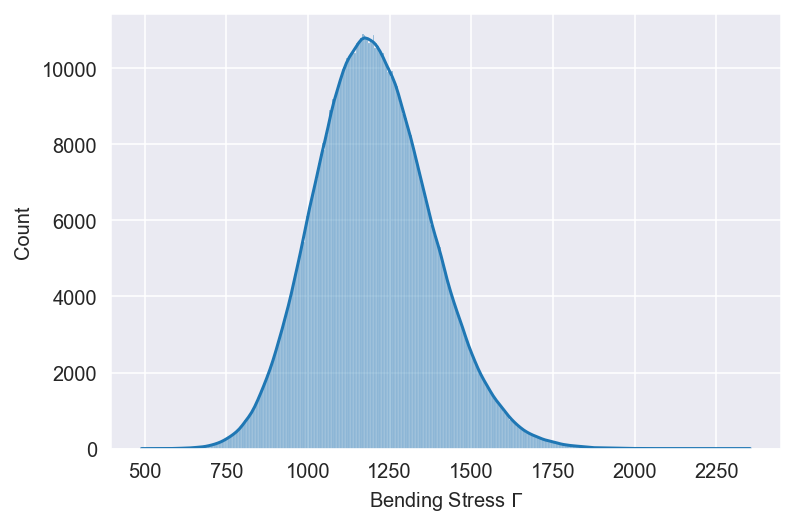

In [7]:
Gamma = 6*L*W/B/H**2

print('\nMean bending stress:', Gamma.mean())
print('RMS fractional bending stress:', 100*Gamma.std()/Gamma.mean(), '%')

sns.set_style('darkgrid')
ax = sns.histplot(Gamma, kde=True);
ax.set(xlabel='Bending Stress $\Gamma$');

# Compute Fraction above tolerance:

In [5]:
tolerance = 1500

Gamma_over_tolerance = Gamma[Gamma > tolerance]   # Returns subarray where Gamma > tolerance

fraction_over_tolerance = len(Gamma_over_tolerance)/len(Gamma)

print('\nFraction over tolerance:' , 100*fraction_over_tolerance, '%')


Fraction over tolerance: 5.2533 %
